In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spotify-songs/dataset.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [3]:
data = pd.read_csv('/kaggle/input/spotify-songs/dataset.csv')

In [4]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


**Unnamed** - стобец, дублирующий идентификаторы трека, от него чуть позже избавимся

**Track_id** - уникальный идентификатор трека, состоящий из случайного набора цифр и латинских символов.

**Artists** - список исполнителей или их псевдонимов, участвовавших в создании композиции. Если их несколько, они перечислены через ";".

**Album_name** - название альбома, в который входит данный трек.

**Track name** - название композиции.

**Popularity** - числовой индекс, отражающий популярность трека. Значение может находиться в диапазоне от 0 до 100. Это целевое значение для предсказания.

**Duration_ms** - продолжительность трека, измеряемая в миллисекундах.

**Explicit** - логический показатель наличия нецензурной лексики или откровенного содержания в тексте песни.

**Danceability** - показатель танцевальности трека. Измеряется значением в диапазоне от 0 до 1 в виде десятичной дроби.

**Energy** - числовая метрика, отражающая уровень энергии трека. Принимает значения от 0 до 1 в виде десятичной дроби.

**Key** - тональность композиции, обозначаемая целым числом от 0 до 11.

**Loudness** - уровень громкости трека, представленный числовым значением в виде десятичной дроби.

**Mode** - тип музыкального лада. Может принимать значение 0 (минор) или 1 (мажор).

**Speechiness** - показатель текстовой составляющей трека, оценивающий долю речи. Значение находится в диапазоне от 0 до 1 и представлено в виде десятичной дроби.

**Acousticness** - метрика, показывающая степень акустичности трека. Представлена значением от 0 до 1 в десятичном формате.

**Instrumentalness** - показатель инструментальности композиции, указывающий вероятность отсутствия вокала. Измеряется значением от 0 до 1 в виде десятичной дроби.

**Liveness** - параметр, отражающий вероятность того, что трек записан вживую. Значение лежит в диапазоне от 0 до 1.

**Valence** - характеристика, описывающая эмоциональную окраску трека (например, позитивность).

**Tempo** - скорость воспроизведения композиции, измеряемая в ударах в минуту (BPM).

**Time signature** - музыкальный размер, указывающий количество долей в такте. Представлен целым числом от 0 до 4.

**Track-genre** - музыкальный жанр композиции.

# **Нормализация данных** 

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [6]:
total_popularity_count = data['popularity'].count()
popularity_zero_count = data[data['popularity'] == 0].shape[0]
print(f"Общее количество записей в 'popularity': {total_popularity_count}")
print(f"Количество записей, где popularity = 0: {popularity_zero_count}")

Общее количество записей в 'popularity': 114000
Количество записей, где popularity = 0: 16020


Немного просмотрев информацию о датасете в kaggle, я обнаружил, что довольно большое количество строк не содержат данных о популярности (вывод данных выше это подтверждает). На мой взгляд, такие данные могут негативно повлиять на обучение модели, поэтому я их удалю

In [7]:
data = data[data['popularity'] != 0]

In [8]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
#Удаляем столбцы Unnamed, track_id, а также значения с пропусками
data = (data
        .drop(data.columns[0], axis=1)
        .drop(data.columns[1], axis=1)
        .dropna())
data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [10]:
#столбец explicit конвертируем в целочисленный тип,True заменится на 1, а False — на 0
data['explicit'] = data['explicit'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97980 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           97980 non-null  object 
 1   album_name        97980 non-null  object 
 2   track_name        97980 non-null  object 
 3   popularity        97980 non-null  int64  
 4   duration_ms       97980 non-null  int64  
 5   explicit          97980 non-null  int64  
 6   danceability      97980 non-null  float64
 7   energy            97980 non-null  float64
 8   key               97980 non-null  int64  
 9   loudness          97980 non-null  float64
 10  mode              97980 non-null  int64  
 11  speechiness       97980 non-null  float64
 12  acousticness      97980 non-null  float64
 13  instrumentalness  97980 non-null  float64
 14  liveness          97980 non-null  float64
 15  valence           97980 non-null  float64
 16  tempo             97980 non-null  float64
 1

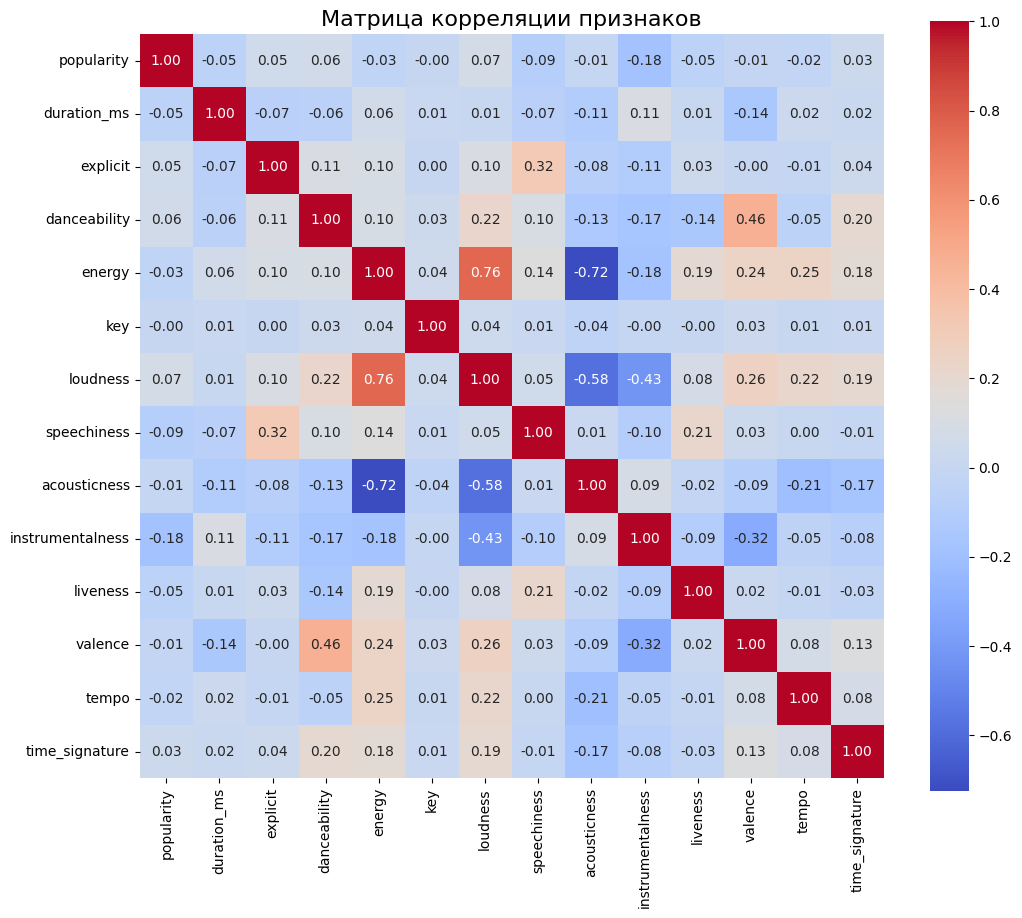

In [11]:
#Строим матрицу корреляции признаков по столбцам с числовыми значениями
correlation_matrix = data.loc[:, [
    'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 
    'loudness', 'speechiness', 'acousticness', 'instrumentalness', 
    'liveness', 'valence', 'tempo', 'time_signature'
]].corr()

# Настраиваем размер фигуры
plt.figure(figsize=(12, 10))

# Создаём тепловую карту с помощью seaborn
sns.heatmap(
    correlation_matrix, 
    annot=True,  # Показать значения корреляции на тепловой карте
    fmt=".2f",   # Формат значений
    cmap="coolwarm",  # Цветовая палитра
    cbar=True,  # Отображение цветовой шкалы
    square=True # Квадратная форма ячеек
)

plt.title("Матрица корреляции признаков", fontsize=16)
plt.show()

**energy** и **loudness**: показатель 0.76 говорит о сильной корреляции между энергичностью и громкостью песни

Также прослеживается корреляция между признаками **danceability** и **valence**: 0.48. Танцевальные песни более эмоциональны

Неожиданная корреляция между признаками **speechiness** и **explicit** (0.31) свидетельствует о наличии материалов для взрослых в композициях с уклоном на текст.

**valence** и **loudness**: корреляция 0.28 - эмоциональная музыка более громкая

**instrumentalness** и **acousticness**: корреляция 0.43. Инструментальные композиции склонны к акустическому звучанию

В то же время большая отрицательная корреляция признаков как **acousticness** и **energy** (-0.73), так и **instrumentalness** и **energy** (-0.59) указывает на то, что акустическая и инструментальная музыка, как правило, неэнергична

**acousticness** и **loudness**: отрицательная корреляция -0.59 свидетельствует о том, что акустические песни чаще всего в тихом исполнении

**instrumentalness** и **valence** - признаки имеют отрицательную корреляцию (-0.32) - инструментальная музыка менее эмоциональна.
 
Остальные признаки, включая popularity, имеют низкие корреляции. Это говорит о том, что популярность песни определяется множеством факторов, которые не отражены в текущих признаках.

# **Гипотезы о факторах, влияющих на популярность песен:**
1. **track_genre**: попсовые жарны имеют более широкую аудиторию, чем нишевые
2. **energy**: энергичная музыка чаще нравятся широкой аудитории и популиризируется на различного рода тусовках, вечеринках и прочих мероприятиях
3. **danceability**: танцевальная музыка популярна,так как также часто используются в клубах и т.д.
4. **loudness**: громкие и насыщенные звучанием песни могут привлекать больше слушателей
5. **tempo**: песни с быстрым темпом 120-150bpm более популярны среди массовой аудитории.
6. **duration_ms**: популярные песни не должны длиться слишком долго, чтобы среднестатичстический пользователь не успел утомиться.
7. **explicit**: песни без отметки "для взрослых" более популярны, так как охватывают более широкую аудиторию, включая молодежь и детей,а также их допустимо прослушивать в общественных местах
8. **artists**: песни, созданные в коллаборации артистов популярны, так как охватывают большую аудиторию фанатов.

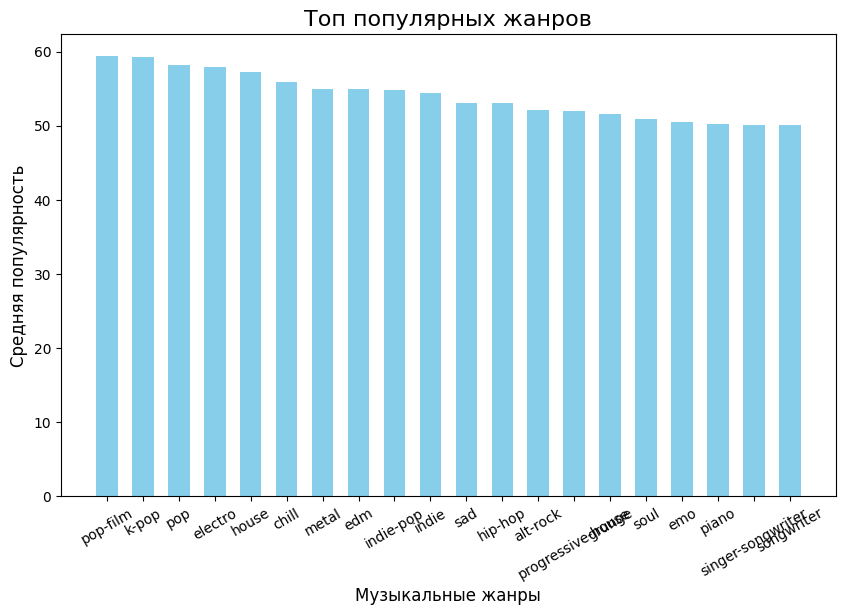

In [12]:
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

top_genres = genre_popularity.head(20)

genres = top_genres.index
popularity = top_genres.values

plt.figure(figsize=(10, 6))
plt.bar(genres, popularity, color='skyblue', width=0.6)

plt.title('Топ популярных жанров', fontsize=16)
plt.xlabel('Музыкальные жанры', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

График не позволяет объективно оценить гипотезу о связи определенных жанров с популярностью песни, так как в датасете их представленно очень большое количество. 

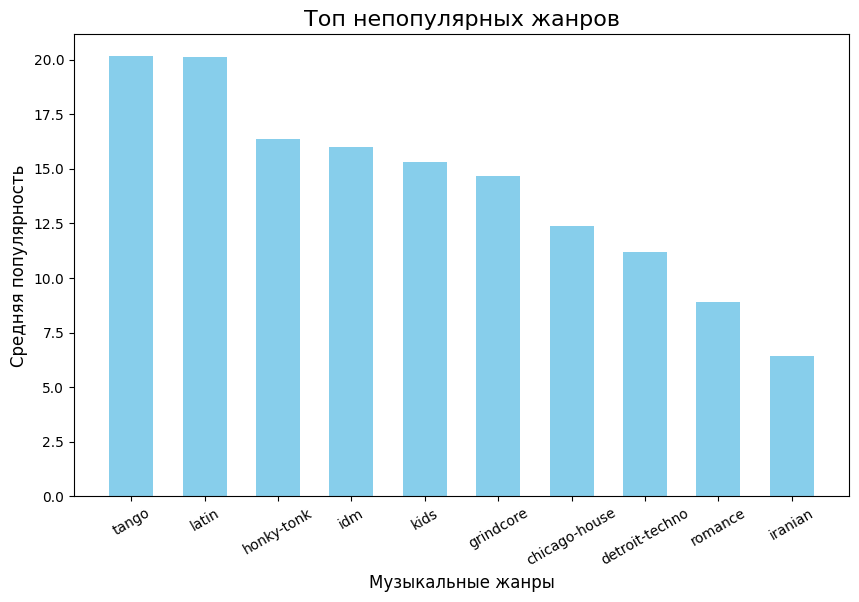

In [13]:
genre_popularity = data.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

top_genres = genre_popularity.tail(10)

genres = top_genres.index
popularity = top_genres.values

plt.figure(figsize=(10, 6))
plt.bar(genres, popularity, color='skyblue', width=0.6)

plt.title('Топ непопулярных жанров', fontsize=16)
plt.xlabel('Музыкальные жанры', fontsize=12)
plt.ylabel('Средняя популярность', fontsize=12)
plt.xticks(rotation=30, fontsize=10)
plt.yticks(fontsize=10)

plt.show()

2 этих графика **подтверждают** гипотезу №1 о связи определенных жанров с популярностью музыки, поскольку мы можем выделить наиболее и наименее популярные из них, со значительным отрывом

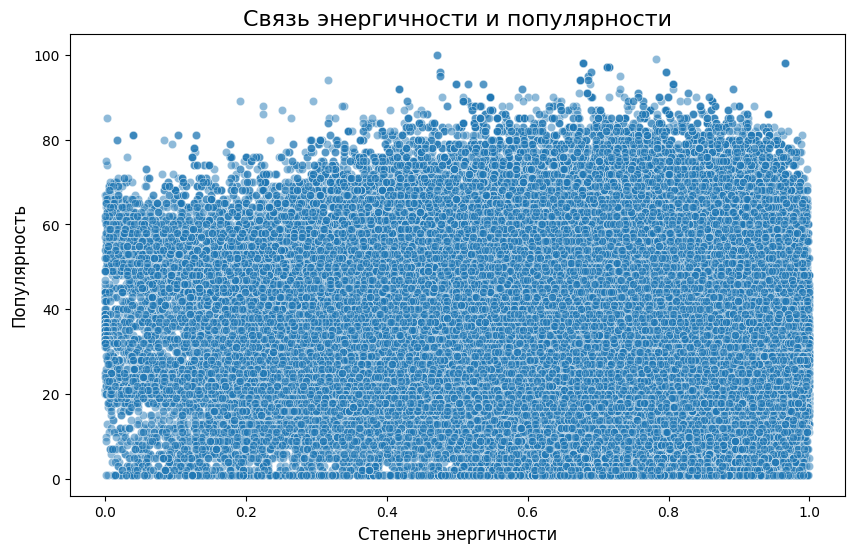

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='energy', y='popularity', data=data, alpha=0.5)
plt.title("Связь энергичности и популярности", fontsize=16)
plt.xlabel("Степень энергичности", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.show()

Гипотеза №2 **не подтвердилась**, степень энергичности особо не влияет на популярность музыки

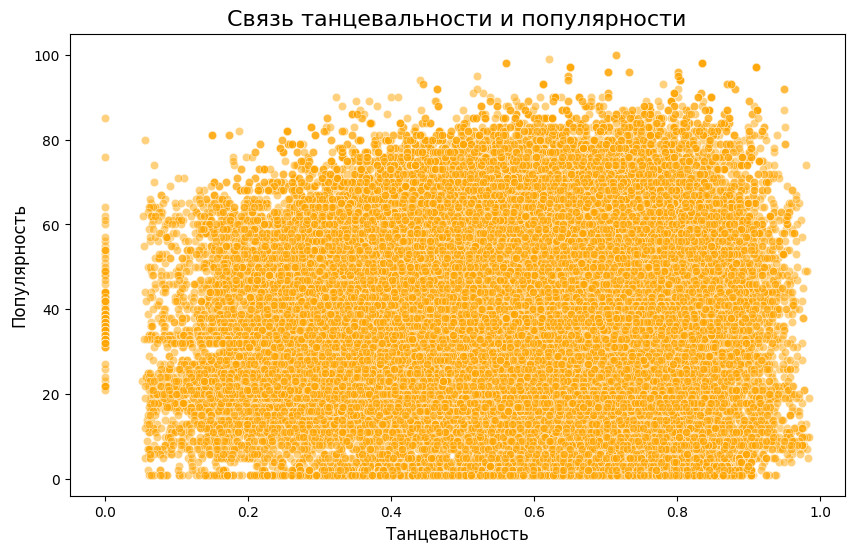

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='danceability', y='popularity', data=data, alpha=0.5, color='orange')
plt.title("Связь танцевальности и популярности", fontsize=16)
plt.xlabel("Танцевальность", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.show()

Гипотеза №3 **не подтвердилась**, степень танцевальности особо не влияет на популярность музыки

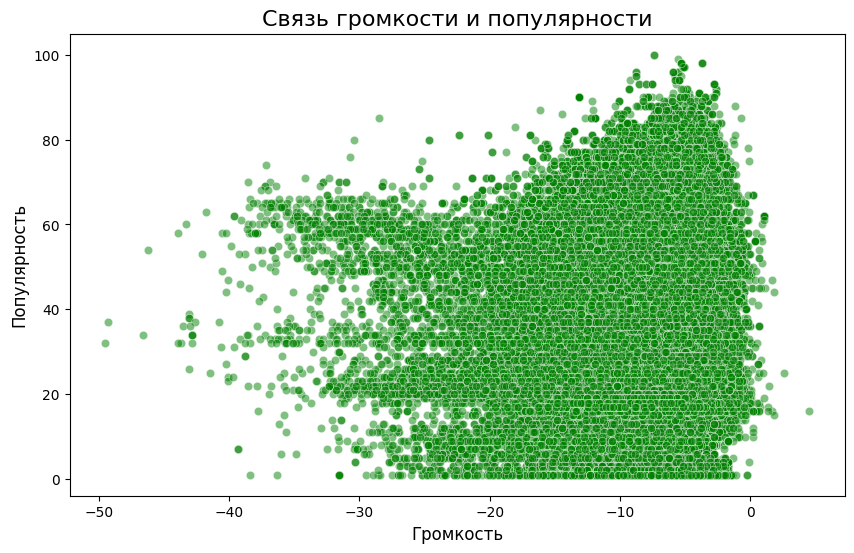

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='loudness', y='popularity', data=data, alpha=0.5, color='green')
plt.title("Связь громкости и популярности", fontsize=16)
plt.xlabel("Громкость", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.show()

Гипотеза №4 **подтвердилась**. Судя по графику, большинство композиций находятся в диапазоне от -20 до 0 Дб, а наиболее популярные встречаются лишь в диапазоне от -10 до 0 Дб.

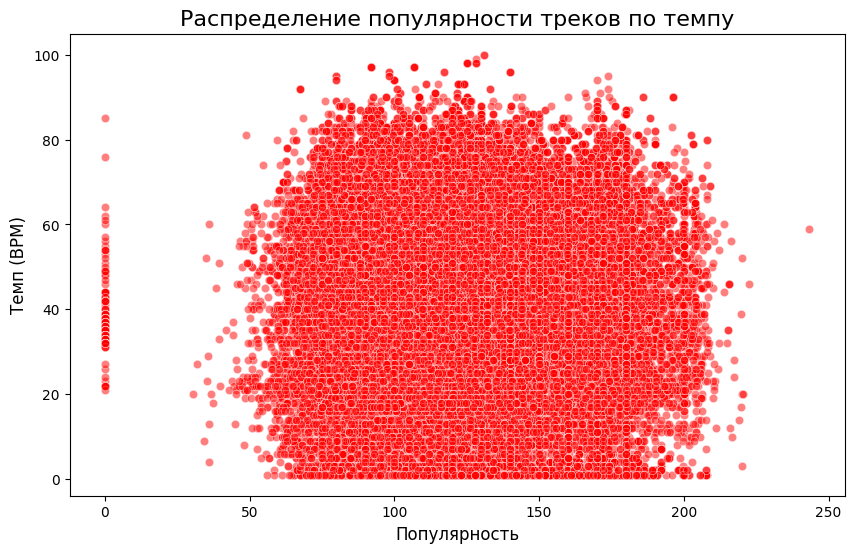

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo', y='popularity', data=data, alpha=0.5, color='red')
plt.title("Распределение популярности треков по темпу", fontsize=16)
plt.xlabel("Популярность", fontsize=12)
plt.ylabel("Темп (BPM)", fontsize=12)
plt.show()

Гипотеза №5 **не подтвердилась** - скорость музыки не влияет на популярность

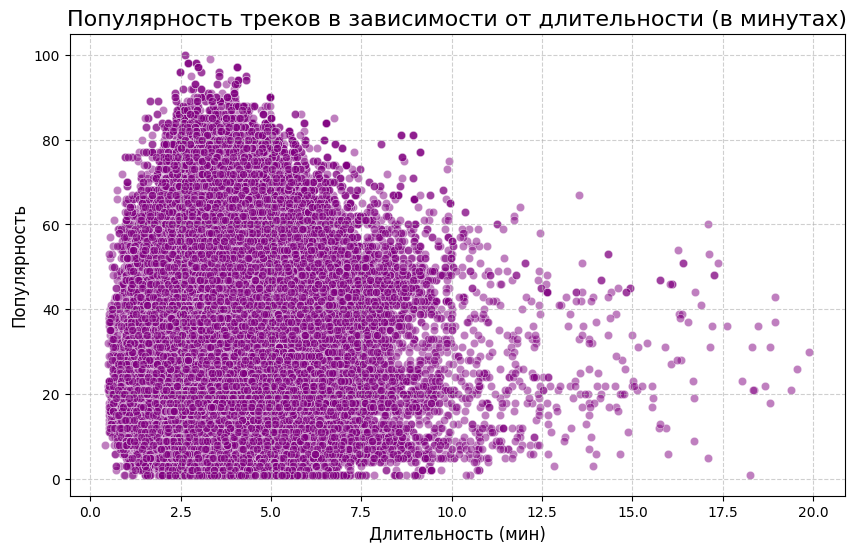

In [18]:
data['duration_min'] = data['duration_ms'] / 60000

# выводим треки только до 20 минут
filtered_data = data[data['duration_min'] <= 20]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='duration_min', y='popularity', data=filtered_data, alpha=0.5, color="purple")
plt.title("Популярность треков в зависимости от длительности (в минутах)", fontsize=16)
plt.xlabel("Длительность (мин)", fontsize=12)
plt.ylabel("Популярность", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

Гипотеза №6 **подтвердилась**, наиболее популярные песни длятся не дольше 5 
минут

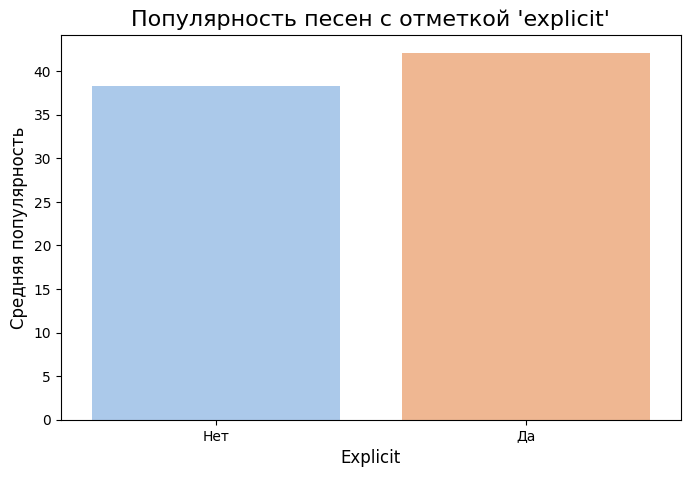

In [19]:
explicit_popularity = data.groupby('explicit')['popularity'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=explicit_popularity.index, y=explicit_popularity.values, palette='pastel')
plt.title("Популярность песен с отметкой 'explicit'", fontsize=16)
plt.xlabel("Explicit", fontsize=12)
plt.ylabel("Средняя популярность", fontsize=12)
plt.xticks([0, 1], ['Нет', 'Да'])
plt.show()

Гипотеза №7 **не подтвердилась**, песни с отметкой Explicit и без +- одинаково популярны

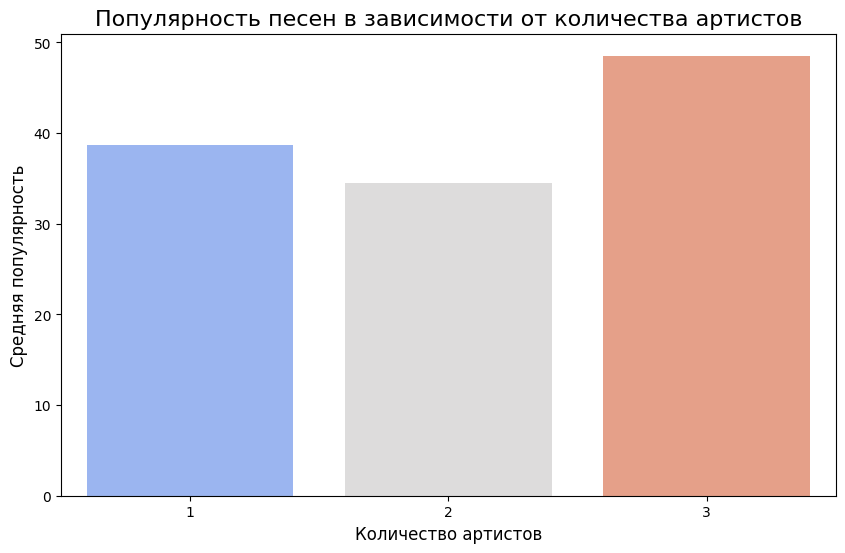

In [20]:
data['num_artists'] = data['artists'].apply(lambda x: len(str(x).split(',')))
collab_popularity = data.groupby('num_artists')['popularity'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=collab_popularity.index, y=collab_popularity.values, palette='coolwarm')
plt.title("Популярность песен в зависимости от количества артистов", fontsize=16)
plt.xlabel("Количество артистов", fontsize=12)
plt.ylabel("Средняя популярность", fontsize=12)
plt.show()

Гипотеза №8 **подтвердилась**, средняя популярность треков с 3 исполнителями выше, чем с 1 или 2

# **Создание новых признаков**
1. **energy_loudness_prod**: комбинация energy и loudness 
2.  **low_energy_instrumental**: признак выделяет спокойную акустическую музыку, если комопзиция подходит под это описание - 1, иначе 0
3. **genre_correlation**: если значение track_genre больше больше медианного,то 1, иначе 0  
4. **loudness_category**: параметр громкости разобьем на 4 категории: <-30Дб; -30Дб..-20Дб; -20Дб..-10Дб; -10Дб..0Дб значения для каждого промежутка соответсвтенно 1, 2, 3, 4.
5. **duration_category**: параметр громкости разобьем на 5 категориq: до 2 минут; 2-5 минут; 5-8 минут; 8-12 минут, значения для каждого промежутка соответсвтенно 1, 2, 3, 4, 5.
6. **artists_quantity**: количество исполнителей

In [21]:
# 1 Признак
data['energy_loudness_prod'] = data['energy'] * data['loudness']

# 2 Признак
data['low_energy_instrumental'] = ((data['acousticness'] > data['acousticness'].mean()) & (data['energy'] < data['energy'].mean())).astype(int)

# 3 Признак
genre_popularity = data.groupby('track_genre')['popularity'].mean()
threshold = genre_popularity.mean()
def genre_correlation(genre):
    if genre in genre_popularity:
        return 1 if genre_popularity[genre] > threshold else 0
data['genre_category'] = data['track_genre'].apply(genre_correlation)

# 4 Признак
bins_loudness = [-float('inf'), -30, -20, -10, 0]
labels_loudness = [1, 2, 3, 4]
data['loudness_category'] = pd.cut(data['loudness'], bins=bins_loudness, labels=labels_loudness).cat.add_categories([0]).fillna(0).astype(int)

# 5 Признак
bins_duration = [0, 2, 5, 8, 12, float('inf')]
labels_duration = [1, 2, 3, 4, 5]
data['duration_category'] = pd.cut(data['duration_min'], bins=bins_duration, labels=labels_duration).cat.add_categories([0]).fillna(0).astype(int)

# 6 Признак
def count_artists_category(artists):
    if isinstance(artists, str):
        return len(artists.split(","))
data['artists_quantity'] = data['artists'].apply(count_artists_category)

data.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,time_signature,track_genre,duration_min,num_artists,energy_loudness_prod,low_energy_instrumental,genre_category,loudness_category,duration_category,artists_quantity
0,Gen Hoshino,Comedy,Comedy,73,230666,0,0.676,0.4610,1,-6.746,...,4,acoustic,3.844433,1,-3.109906,0,1,4,2,1
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,0,0.420,0.1660,1,-17.235,...,4,acoustic,2.493500,1,-2.861010,1,1,3,2,1
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,0,0.438,0.3590,0,-9.734,...,4,acoustic,3.513767,1,-3.494506,0,1,4,2,1
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,0,0.266,0.0596,0,-18.515,...,3,acoustic,3.365550,1,-1.103494,1,1,3,2,1
4,Chord Overstreet,Hold On,Hold On,82,198853,0,0.618,0.4430,2,-9.681,...,4,acoustic,3.314217,1,-4.288683,1,1,4,2,1


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97980 entries, 0 to 113999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   artists                  97980 non-null  object 
 1   album_name               97980 non-null  object 
 2   track_name               97980 non-null  object 
 3   popularity               97980 non-null  int64  
 4   duration_ms              97980 non-null  int64  
 5   explicit                 97980 non-null  int64  
 6   danceability             97980 non-null  float64
 7   energy                   97980 non-null  float64
 8   key                      97980 non-null  int64  
 9   loudness                 97980 non-null  float64
 10  mode                     97980 non-null  int64  
 11  speechiness              97980 non-null  float64
 12  acousticness             97980 non-null  float64
 13  instrumentalness         97980 non-null  float64
 14  liveness                 9

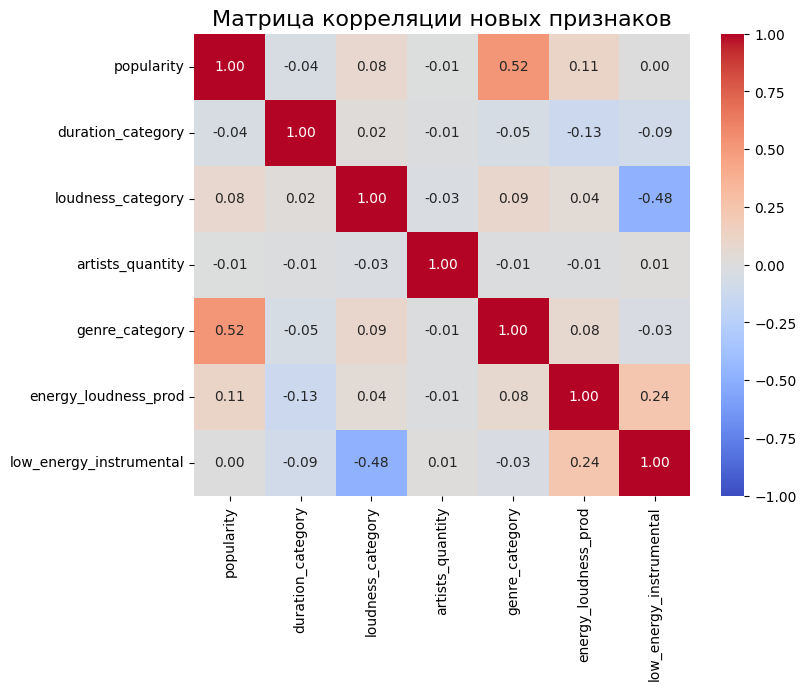

In [23]:
columns_for_corr = ['popularity', 'duration_category', 'loudness_category', 'artists_quantity', 'genre_category', 'energy_loudness_prod', 'low_energy_instrumental']

correlation_matrix = data[columns_for_corr].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Матрица корреляции новых признаков', fontsize=16)
plt.show()

К сожалению, новые признаки слабо коррелируют с целевым, за исключением genre_category

# **Создание базовой модели для выявления наиболее важных признаков**

Закодируем колонки, содержаещие тип object. 

In [24]:
from copy import deepcopy
from sklearn.preprocessing import LabelEncoder

normalized_data = deepcopy(data)
object_cols = normalized_data.select_dtypes(include=['object']).columns
label_encoders = {}

for col in object_cols:
    label_encoder = LabelEncoder()
    normalized_data[col] = label_encoder.fit_transform(normalized_data[col])
    label_encoders[col] = label_encoder  # Сохраняем LabelEncoder для возможного обратного преобразования

Разделение данных на обучающую и тестовую выборки

In [25]:
X = normalized_data.drop(columns=['popularity']) 
y = normalized_data['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

#Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)
# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Test Loss: {loss}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1960/1960 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 513.1623 - val_loss: 267.0646
Epoch 2/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 260.8024 - val_loss: 262.6227
Epoch 3/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 253.9825 - val_loss: 259.8587
Epoch 4/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 253.6782 - val_loss: 255.8502
Epoch 5/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 247.0907 - val_loss: 254.3924
Epoch 6/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 244.5008 - val_loss: 254.7546
Epoch 7/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 242.4761 - val_loss: 250.0265
Epoch 8/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 240.9467 - val_loss: 249.1879
Epoch 9/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 240.1955 - val_loss: 247.7198
Epoch 10/10
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 237.4729 - val_loss: 244.9916
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 245.3105
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 

**Test Loss** - значение функции потерь на тестовых данных
**MSE** -  средняя квадратичная ошибка 
**MAE** - средняя абсолютная ошибка
**RMSE** - корень из средней квадратичной ошибкием

In [28]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'MAPE: {mape}')

MAPE: 1.4977708685296056


**Mape** - метрика, которая измеряет среднюю абсолютную процентную ошибку между предсказанными значениями и истинными

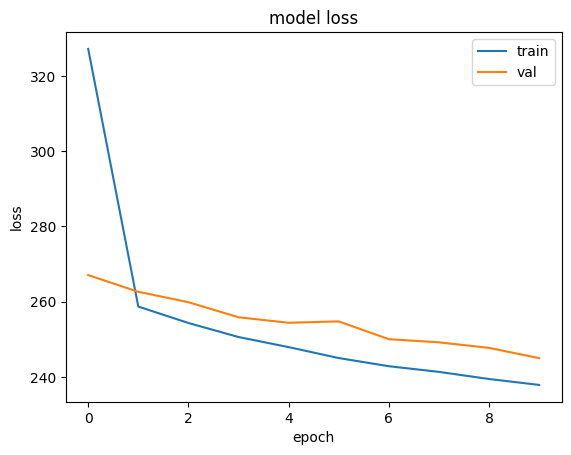

In [29]:
# Изменение потерь на тренировочном датасете
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt. xlabel ('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Параметры измерения ошибок показали низкое качество предсказаний модели на тестовой выборке. Попробую измерить важность признаков с помощью permutation importance для дальнейшего анализа

# **Важность признаков**

613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
613/613 ━━━━━━━━

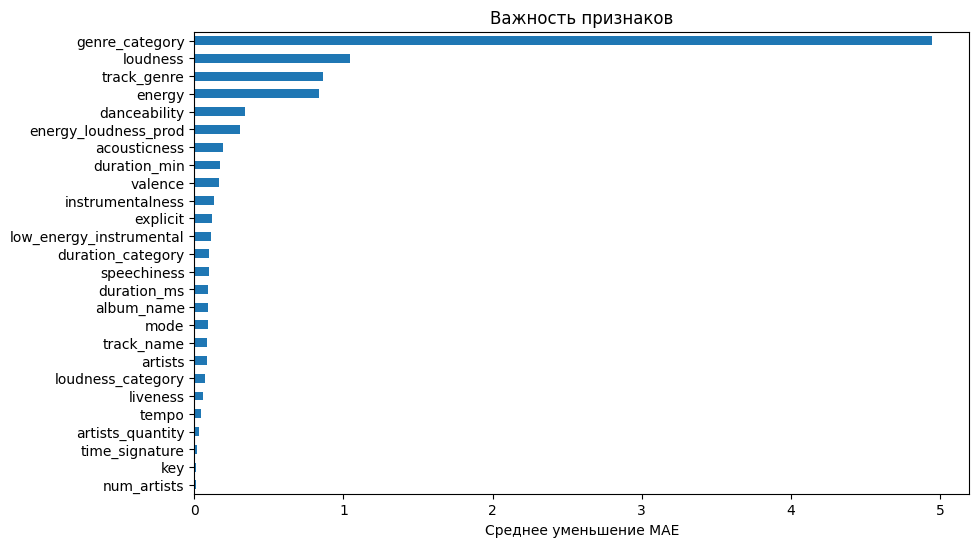

In [30]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()

Permutation importance показал выдающуюся важность нового признака в снижении ошибки модели. В то же время признаки, начиная с num_artists и заканчивая time_signature, продемонстрировали крайне слабое влияние на результат. Поэтому я решил их удалить

In [31]:
new_norm_data = (normalized_data
          .drop(['time_signature',  
                 'key', 
                 'num_artists', 
                 'artists_quantity'], axis=1))
new_norm_data

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,loudness,mode,...,liveness,valence,tempo,track_genre,duration_min,energy_loudness_prod,low_energy_instrumental,genre_category,loudness_category,duration_category
0,9812,7916,11118,73,230666,0,0.676,0.4610,-6.746,0,...,0.3580,0.7150,87.917,0,3.844433,-3.109906,0,1,4,2
1,3123,14527,21361,55,149610,0,0.420,0.1660,-17.235,1,...,0.1010,0.2670,77.489,0,2.493500,-2.861010,1,1,3,2
2,11756,38516,57613,57,210826,0,0.438,0.3590,-9.734,1,...,0.1170,0.1200,76.332,0,3.513767,-3.494506,0,1,4,2
3,14022,8388,9115,71,201933,0,0.266,0.0596,-18.515,1,...,0.1320,0.1430,181.740,0,3.365550,-1.103494,1,1,3,2
4,4980,16589,24381,82,198853,0,0.618,0.4430,-9.681,1,...,0.0829,0.1670,119.949,0,3.314217,-4.288683,1,1,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,21307,65,50593,21,384999,0,0.172,0.2350,-16.393,1,...,0.0863,0.0339,125.995,113,6.416650,-3.852355,1,1,3,3
113996,21307,65,61727,22,385000,0,0.174,0.1170,-18.318,0,...,0.1050,0.0350,85.239,113,6.416667,-2.143206,1,1,3,3
113997,4697,4918,36212,22,271466,0,0.629,0.3290,-10.895,0,...,0.0839,0.7430,132.378,113,4.524433,-3.584455,1,1,3,2
113998,17527,7090,20392,41,283893,0,0.587,0.5060,-10.889,1,...,0.2700,0.4130,135.960,113,4.731550,-5.509834,1,1,3,2


Разделение данных на обучающую и тестовую выборки после удаления колонок

In [32]:
X = new_norm_data.drop(columns=['popularity'])
y = new_norm_data['popularity'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Эксперименты с моделями машинного обучения**

Обучим нейросеть получившимися данными

In [33]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)

#Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)
# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Test Loss: {loss}')
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1960/1960 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 493.8736 - val_loss: 267.0511
Epoch 2/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 259.9110 - val_loss: 262.4333
Epoch 3/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 254.3089 - val_loss: 262.2470
Epoch 4/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 251.4940 - val_loss: 256.1637
Epoch 5/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 247.0009 - val_loss: 254.5390
Epoch 6/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 243.5958 - val_loss: 252.8662
Epoch 7/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 243.2330 - val_loss: 249.0301
Epoch 8/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 241.4954 - val_loss: 247.9793
Epoch 9/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 238.7263 - val_loss: 246.1607
Epoch 10/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 236.7369 - val_loss: 247.5908
Epoch 11/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 238.3008 - val_loss: 252.13

После переобучения той же самой модели на датасете без удаленных колонок результат не изменился

Попробую улучшить модель: углублю структуру с постепенным уменьшением количества нейронов. Для избежания переобучения буду использовать dropout. Количество эпох увеличу до 20

In [34]:
# Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1) 
])

# Компиляция модели
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# Обучение модели
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Оценка модели
loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

print(f'Test Loss: {loss}')

Epoch 1/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 488.5985 - val_loss: 275.2389
Epoch 2/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 279.2614 - val_loss: 262.6273
Epoch 3/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 273.4485 - val_loss: 258.9594
Epoch 4/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 269.2389 - val_loss: 262.4938
Epoch 5/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 267.9595 - val_loss: 257.0027
Epoch 6/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 261.6989 - val_loss: 261.2799
Epoch 7/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 265.3963 - val_loss: 255.0312
Epoch 8/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 262.6046 - val_loss: 256.3597
Epoch 9/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 262.6711 - val_loss: 259.4623
Epoch 10/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 262.4264 - val_loss: 257.4863
Epoch 11/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 255.9290 - val_l

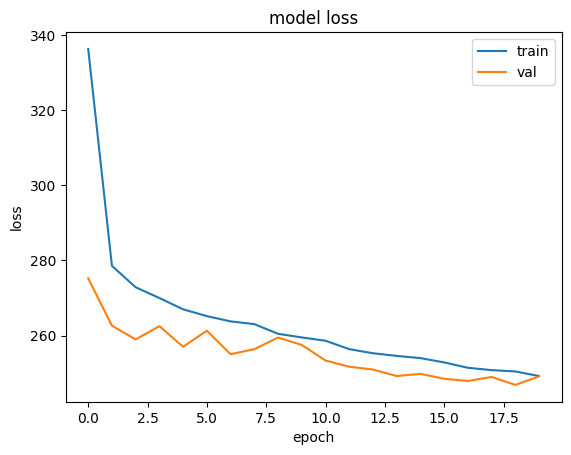

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt. xlabel ('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

На первой эпохе потери резко падают, а дальше более плавно уменьшаются по мере увеличения эпох. Линии для train и val достаточно близки друг к другу, особенно на последних эпохах, что говорит об отсутствии переобучения.

Попрубую еще углубить нейросеть одним слоем на 256 нейронов, для нормализации активации слоев буду использовать BatchNormalization. 

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

print(f'Test Loss: {loss}')

Epoch 1/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 497.4703 - val_loss: 284.2926
Epoch 2/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 297.5538 - val_loss: 278.2075
Epoch 3/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 288.5940 - val_loss: 313.2976
Epoch 4/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 276.7575 - val_loss: 331.7482
Epoch 5/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 269.7023 - val_loss: 335.8447
Epoch 6/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 265.2853 - val_loss: 341.8551
Epoch 7/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 261.3554 - val_loss: 337.3134
Epoch 8/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 257.9466 - val_loss: 329.8480
Epoch 9/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 255.4910 - val_loss: 295.2711
Epoch 10/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 257.6657 - val_loss: 328.6302
Epoch 11/20
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 253.1833 - val_

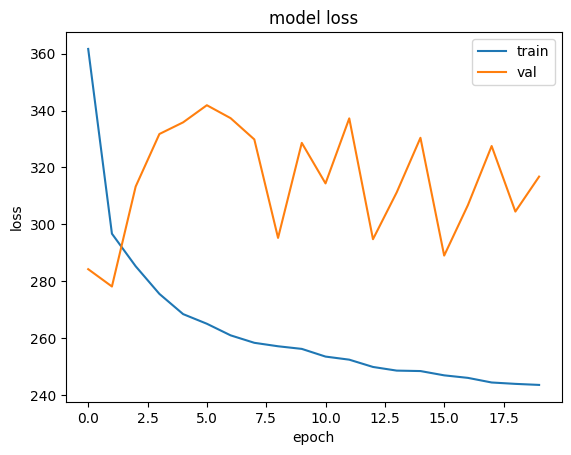

In [37]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt. xlabel ('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Фиксирую небольшое падение loss с 246 до 236 обучающей выборки, а так же дико поломанный график валидационной выборки. Попробую увеличить количество эпох до 30. Во избежании переобучения воспользуюсь колбеком EarlyStopping, а для предотвращения застоя колбеком ReduceLROnPlateau, так как на последних эпохах все медленее и медленее снижаются потери

In [38]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = keras.Sequential([
    keras.layers.Dense(256, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mean_squared_error')

# колбеки
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5)

history = model.fit(X_train, y_train, epochs=30, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop, reduce_lr])

loss = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test)

print(f'Test Loss: {loss}')

Epoch 1/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 506.1586 - val_loss: 257.0119 - learning_rate: 0.0010
Epoch 2/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 264.7950 - val_loss: 253.1803 - learning_rate: 0.0010
Epoch 3/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 259.8597 - val_loss: 252.6761 - learning_rate: 0.0010
Epoch 4/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 261.9906 - val_loss: 248.2426 - learning_rate: 0.0010
Epoch 5/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 256.7215 - val_loss: 246.7493 - learning_rate: 0.0010
Epoch 6/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 248.6460 - val_loss: 244.3046 - learning_rate: 0.0010
Epoch 7/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 253.1075 - val_loss: 245.9822 - learning_rate: 0.0010
Epoch 8/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 249.6797 - val_loss: 244.0253 - learning_rate: 0.0010
Epoch 9/30
1960/1960 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 244.9437 -

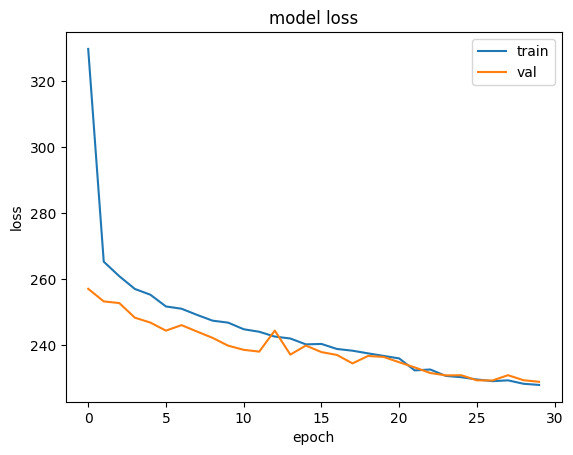

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt. xlabel ('epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

Удалось еще немного понизить потери с 236 до 230. График показал стабильное обучение модели, а так же хорошую сходимость: линии ошибок на обучающей и валидационной выборках практически совпали. Останувлюсь на этой модели.

Вычесление метрик для сравнения с моделями из других семейств

In [40]:
from sklearn.metrics import r2_score

In [41]:
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, predictions)

print("--- Нейронная сеть ---")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')
print(f"R2: {r2:.4f}")

613/613 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
--- Нейронная сеть ---
MAE: 11.052228422548412
MSE: 229.89223711646653
RMSE: 15.162197634791156
MAPE: 1.4093544101808082
R2: 0.3840


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [43]:
# Функция для обучения и оценки моделей
def train_and_evaluate(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAPE: {mape:.4f}")
    print(f"R2: {r2:.4f}")
    return {'MSE': mse, 'MAE': mae, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

**LinearRegression** - простая модель, которая находит оптимальные веса для признаков, минимизируя среднеквадратичную ошибку

In [44]:
linear_model = LinearRegression()

print("--- Линейная модель ---")
linear_results = train_and_evaluate(linear_model, X_train, X_test, y_train, y_test)

--- Линейная модель ---
MAE: 12.4535
MSE: 265.5227
RMSE: 16.2949
MAPE: 1.5857
R2: 0.2885


**RandomForestRegressor** - модель, использующая множество деревьев решений, где каждое дерево обучается на случайной подвыборке данных. Принцип работы: усредняет предсказания множества деревьев для уменьшения переобучения и улучшения точности.

In [45]:
tree_model = RandomForestRegressor(n_estimators=100, random_state=42)

print("\n--- Деревья решений ---")
tree_results = train_and_evaluate(tree_model, X_train, X_test, y_train, y_test)


--- Деревья решений ---
MAE: 8.6394
MSE: 153.7553
RMSE: 12.3998
MAPE: 1.0003
R2: 0.5880


**XGBRegressor** - модель, основанная на градиентном бустинге, которая строит деревья последовательно, минимизируя ошибку предыдущих шагов. Принцип работы: Улучшает предсказания путем добавления новых деревьев, фокусируясь на "трудных" примерах. Использует регуляризацию для предотвращения переобучения.

In [46]:
boosting_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

print("\n--- Градиентный бустинг ---")
boosting_results = train_and_evaluate(boosting_model, X_train, X_test, y_train, y_test)


--- Градиентный бустинг ---
MAE: 10.2696
MSE: 197.4464
RMSE: 14.0516
MAPE: 1.3074
R2: 0.4709


Лучшей моделью оказалась RandomForestRegressor с наибольшим коэфициентом детерминации R2 0.59. На втором месте располагается модель XGBRegressor из семейства градиентного бустинга с R2 0.47. Третье место получает самая долгоубучаемая модель - нейронная сеть с R2 0.38, а на последнем месте самая быстрообучаемая модель - линейной регрессии LinearRegression R2 0.29.

# **Кросс-валидация RandomForestRegressor**

In [47]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
# Функция для вычисления MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

X_train_np = np.array(X_train)
y_train_np = np.array(y_train)

tree_model = RandomForestRegressor(n_estimators=100, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Списки для хранения метрик
mae_list = []
mse_list = []
rmse_list = []
mape_list = []
r2_list = []

# Проход по фолдам
for train_index, test_index in kf.split(X_train_np):
    # Разделение данных
    X_fold_train, X_fold_test = X_train_np[train_index], X_train_np[test_index]
    y_fold_train, y_fold_test = y_train_np[train_index], y_train_np[test_index]
    
    # Обучение модели
    tree_model.fit(X_fold_train, y_fold_train)
    y_pred = tree_model.predict(X_fold_test)
    
    # Вычисление метрик
    mae_list.append(mean_absolute_error(y_fold_test, y_pred))
    mse_list.append(mean_squared_error(y_fold_test, y_pred))
    rmse_list.append(mean_squared_error(y_fold_test, y_pred, squared=False))
    mape_list.append(mean_absolute_percentage_error(y_fold_test, y_pred))
    r2_list.append(r2_score(y_fold_test, y_pred))

# Средние метрики
print("--- Кросс-валидация RandomForestRegressor (5 фолдов) ---")
print(f"Средний MAE: {np.mean(mae_list):.4f}")
print(f"Средний MSE: {np.mean(mse_list):.4f}")
print(f"Средний RMSE: {np.mean(rmse_list):.4f}")
print(f"Средний MAPE: {np.mean(mape_list):.4f}")
print(f"Средний R2: {np.mean(r2_list):.4f}")

--- Кросс-валидация RandomForestRegressor (5 фолдов) ---
Средний MAE: 8.8923
Средний MSE: 161.0912
Средний RMSE: 12.6914
Средний MAPE: 105.3569
Средний R2: 0.5617


# **Вывод**

В ходе работы были исследованы данные о музыкальных треках на площадке Spotify с целью выявления и создания признаков, по которым модель машинного обучения сможет предсказывать популярность песен. Из исходных данных оказалось весьма трудно определить закономерности, которые позволят добиться поставленной цели. Были придуманы гипотезы, на основании наиболее успешных создавались новые признаки, которые продемонстрировали слабую эффективность в обучении модели. В качестве исключения выступил признак, построенный на сравнении медианного значения объединения колонок с жанрами и таргетом. Такой подход можно назвать хитростью, однако это был единственный способ, который позволил мне улучшить качество исходных данных. 

На этих данных были обучены 4 модели машинного обучения: нейронная сеть keras, линейная LinearRegression, деревья RandomForestRegressor и модифицкации градиентного бустинга XGBRegressor. Лучше всего себя показала модель RandomForestRegressor, для которой была проведена кросс-валидация. По сравнению с самой первой моделью, кросс-валидация показала значительно улучшенные результаты.